# TITANIC 01


Project to aim to predict passenger survival base on a sample data (TRAIN.CSV)
in this project I will crete:

*Data gathering
*Data preprocessing
*Exploratory data analysis (EDA)
*Feature engineering
*Training machine learning Classification models
*Density estimation
*Dimensionality reduction


It wil perfomre by creating a Model pipeline



### Import library

In [420]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#visualization
import datetime

import itertools
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt


import math
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output


import random
#import optuna

from sklearn.utils import class_weight
import tensorflow as tf

#import tensorflow_addons as tfa

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split, GridSearchCV 
#from catboost import CatBoostClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import log_loss, mean_squared_error,accuracy_score, classification_report, confusion_matrix, roc_curve, auc

from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, TransformerMixin
 



### Importa Data & Stats

In [421]:
df = pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [422]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [423]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [424]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [425]:
 df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### TEST

In [426]:
test_df.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [427]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [428]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [429]:
 test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [430]:
 #test_df['Cabin'].isnull().sum()

In [431]:
df.groupby(['Cabin']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1,1,1
A14,1,1,1,1,1,0,1,1,1,1,1
A16,1,1,1,1,1,1,1,1,1,1,1
A19,1,1,1,1,1,0,1,1,1,1,1
A20,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
F33,3,3,3,3,3,3,3,3,3,3,3
F38,1,1,1,1,1,0,1,1,1,1,1
F4,2,2,2,2,2,2,2,2,2,2,2


In [432]:
df.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [433]:
df[df['Embarked'].isnull()]
#  df[df.isna().any(axis=1)]
#  df[df['Cabin'] == 'B28']
#  df[df['Fare'] > 512]
# df[(df['Status'] != 'Noble') & (df['Status'] != 'Military') & (df['Status'] != 'Common')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [434]:
df["Embarked"] = df["Embarked"].fillna("S")

In [435]:
df["Embarked"][df["Embarked"]=='S']='SA' 
df["Embarked"][df["Embarked"]=='Q']='QU'
df["Embarked"][df["Embarked"]=='C']='CH' 

test_df["Embarked"][test_df["Embarked"]=='S']='SA' 
test_df["Embarked"][test_df["Embarked"]=='Q']='QU'
test_df["Embarked"][test_df["Embarked"]=='C']='CH' 



In [436]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,SA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,CH
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,SA
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,SA
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,SA
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,SA
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,SA
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,SA
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,CH


In [437]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [438]:
df['First name'] = df['Name'].str.split(',|\\.',expand = True)[2] #expand set to True to return a df instead of series
df['First name'] = df['First name'].str.strip() #strip leading and trailing white spaces
df['Last name'] = df['Name'].str.split(',|\\.',expand = True)[0] #expand set to True to return a df instead of series
df['Last name'] = df['Last name'].str.strip()
df['Title'] = df['Name'].str.split(',|\\.',expand = True)[1] #expand set to True to return a df instead of series
df['Title'] = df['Title'].str.strip()

In [439]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,First name,Last name,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,SA,2,Owen Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,CH,2,John Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,SA,1,Laina,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,SA,2,Jacques Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,SA,1,William Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,QU,1,James,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,SA,1,Timothy J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,SA,5,Gosta Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,SA,3,Oscar W (Elisabeth Vilhelmina Berg),Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,CH,2,Nicholas (Adele Achem),Nasser,Mrs


In [440]:
df['Title'].value_counts() #just display the name column summary

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Sir               1
Don               1
Mme               1
the Countess      1
Ms                1
Capt              1
Lady              1
Jonkheer          1
Name: Title, dtype: int64

In [441]:
df[df['Title'] == 'Don']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,First name,Last name,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,CH,1,Manuel E,Uruchurtu,Don


In [442]:
def Status(x):
    title=x['Title']
    if title in ['Countess', 'Jonkheer', 'Lady','Sir','Don', 'Dona','the Countess']:
        return 'Noble'
    elif title in ['Major', 'Capt', 'Col']:
        return 'Military'
    elif title in ['Master', 'Mme','Mlle', 'Master','Miss','Mlle','Mme','Mr','Mrs','Ms']:
        return 'Common'
    elif title in ['Dr']:
        return 'Dr'
    elif title in ['Rev']:
        return 'Clergy'
    
    else:
        return Status     

In [443]:
df['Status']=df.apply(Status, axis=1)

In [444]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,First name,Last name,Title,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,SA,2,Owen Harris,Braund,Mr,Common
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,CH,2,John Bradley (Florence Briggs Thayer),Cumings,Mrs,Common
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,SA,1,Laina,Heikkinen,Miss,Common
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,SA,2,Jacques Heath (Lily May Peel),Futrelle,Mrs,Common
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,SA,1,William Henry,Allen,Mr,Common
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,QU,1,James,Moran,Mr,Common
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,SA,1,Timothy J,McCarthy,Mr,Common
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,SA,5,Gosta Leonard,Palsson,Master,Common
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,SA,3,Oscar W (Elisabeth Vilhelmina Berg),Johnson,Mrs,Common
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,CH,2,Nicholas (Adele Achem),Nasser,Mrs,Common


In [445]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir', 'Master']:
        return 'Mr'
    elif title in ['Countess', 'Mme','the Countess','Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms', 'Lady']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
df['Title']=df.apply(replace_titles, axis=1)

In [446]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,First name,Last name,Title,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,SA,2,Owen Harris,Braund,Mr,Common
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,CH,2,John Bradley (Florence Briggs Thayer),Cumings,Mrs,Common
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,SA,1,Laina,Heikkinen,Miss,Common
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,SA,2,Jacques Heath (Lily May Peel),Futrelle,Mrs,Common
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,SA,1,William Henry,Allen,Mr,Common
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,QU,1,James,Moran,Mr,Common
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,SA,1,Timothy J,McCarthy,Mr,Common
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,SA,5,Gosta Leonard,Palsson,Mr,Common
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,SA,3,Oscar W (Elisabeth Vilhelmina Berg),Johnson,Mrs,Common
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,CH,2,Nicholas (Adele Achem),Nasser,Mrs,Common


In [447]:
df['ticket length'] = df['Ticket'].apply(lambda x: len(x))

<AxesSubplot:xlabel='Status'>

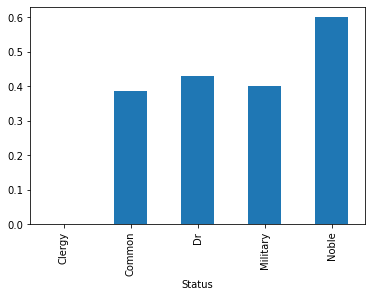

In [448]:
df['Survived'].groupby(df['Status']).mean().plot(kind='bar')

In [449]:
df['Status'].value_counts()

Common      868
Dr            7
Clergy        6
Noble         5
Military      5
Name: Status, dtype: int64

In [450]:
df['Deck'] = df['Cabin'].str.replace('[0-9]','').str.split(' ', expand=True)[0]
#1. delete cabin number, leaving leading letter (deck); 2. since multiple cabins are assigned, just get the first one, they are all on the same deck

In [451]:
df['Deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

In [452]:
df["Deck"] = df["Deck"].fillna("U")

<AxesSubplot:xlabel='Deck'>

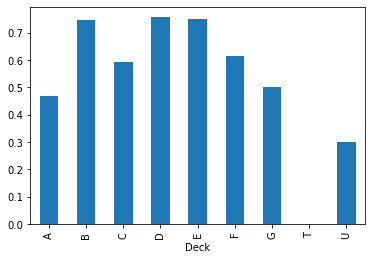

In [453]:
df['Survived'].groupby(df['Deck']).mean().plot(kind='bar')

## Filling in Missing Age data

In [454]:
from sklearn.ensemble import RandomForestRegressor


#function to get categorical and numeric columns 
def cat_cols(df):
    return df.columns[df.dtypes == 'category'].append(df.columns[df.dtypes == 'object'])

def num_cols(df):
    return df.columns[df.dtypes == 'int64'].append(df.columns[df.dtypes == 'float64'])

def bool_cols(df):
    return df.columns[df.dtypes == 'bool']

class CustomOneHotEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        result = pd.get_dummies(X)
        self.feature_names = result.columns

        return result

# new way to do pipeline - seperate column transformations from the rest of the pipeline

# type transformers for column transformer
cat_pipe = Pipeline(steps=[
    ('ohc', CustomOneHotEncoder(handle_unknown='ignore'))])
    #('ohc', OneHotEncoder(handle_unknown='ignore'))])

num_pipe = Pipeline(steps=[
    ('scaler', StandardScaler())])

bool_pipe = Pipeline(steps=[
    ('empty', EmptyTransformer())])

# column transformations
column_transformer = ColumnTransformer(transformers=[
    ('cat', cat_pipe, cat_features),
    ('num', num_pipe, num_features),
    ('bool', bool_pipe, bool_features)])# , sparse_threshold=0)

#transform columns
X_train_trans = column_transformer.fit_transform(X_train)

# feature engineering for kbest
feature_engineering = FeatureUnion([
   # ('pca', PCA(n_components=2)),
    ('kbest', SelectKBest())])

#model
rf = RandomForestClassifier(n_estimators=10, criterion='gini',bootstrap=False)

# combine all steps to pipeline
pipe = Pipeline(steps=[
    ('engineering', feature_engineering),
    ('clf', rf)])

# preprocessing params
pre_params = {
    #'engineering__pca__n_components': [2, 3, 4, 6],
    'engineering__kbest__k': [3]}

# model params
clf_params = {'clf': [rf],
              'clf__max_features': [3, 'auto'],
              'clf__max_depth':  [10, 12],
              'clf__min_samples_split': [0.01]}

params = [{**clf_params, **pre_params}]

# instantiate model
model = GridSearchCV(pipe, cv=5, param_grid=params, scoring='accuracy', 
                      n_jobs=3, verbose=True)

#fit model
model.fit(X_train_trans, y_train)

In [455]:
titanicWithAge = df[pd.isnull(df['Age']) == False]
titanicWithoutAge = df[pd.isnull(df['Age'])]

In [456]:
variables = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age']

In [457]:
one_hot_encoded_Embarked = pd.get_dummies(titanicWithAge['Embarked'])
one_hot_encoded_Sex = pd.get_dummies(titanicWithAge['Sex'])
one_hot_encoded_Title = pd.get_dummies(titanicWithAge['Title'])
one_hot_encoded_Status= pd.get_dummies(titanicWithAge['Status'])
one_hot_encoded_Deck = pd.get_dummies(titanicWithAge['Deck'])


titanicWithAge = titanicWithAge[variables]
titanicWithAge = pd.concat([titanicWithAge, one_hot_encoded_Sex, one_hot_encoded_Embarked, one_hot_encoded_Title,one_hot_encoded_Status,one_hot_encoded_Deck], axis = 1)

one_hot_encoded_Embarked = pd.get_dummies(titanicWithoutAge['Embarked'])
one_hot_encoded_Sex = pd.get_dummies(titanicWithoutAge['Sex'])
one_hot_encoded_Title = pd.get_dummies(titanicWithoutAge['Title'])
one_hot_encoded_Status = pd.get_dummies(titanicWithoutAge['Status'])
one_hot_encoded_Deck = pd.get_dummies(titanicWithoutAge['Deck'])




titanicWithoutAge = titanicWithoutAge[variables]
titanicWithoutAge = pd.concat([titanicWithoutAge, one_hot_encoded_Sex, one_hot_encoded_Embarked, one_hot_encoded_Title,one_hot_encoded_Status,one_hot_encoded_Deck], axis = 1)


In [458]:
titanicWithAge
for col in titanicWithAge.columns:
    print(col)

Pclass
SibSp
Parch
Fare
Age
female
male
CH
QU
SA
Miss
Mr
Mrs
Clergy
Common
Dr
Military
Noble
A
B
C
D
E
F
G
T
U


In [459]:
titanicWithoutAge
for col in titanicWithoutAge.columns:
    print(col)

Pclass
SibSp
Parch
Fare
Age
female
male
CH
QU
SA
Miss
Mr
Mrs
Common
Dr
A
B
C
D
E
F
U


In [460]:
#Missing column in withoutage data
titanicWithoutAge['Clergy']=0
titanicWithoutAge['Military']=0
titanicWithoutAge['G']=0
titanicWithoutAge['T']=0
titanicWithoutAge['Noble']=0
#titanicWithoutAge['Clergy', 'Military', 'G', 'Noble', 'T']=0


In [461]:
titanicWithAge.head(10)

,Pclass,SibSp,Parch,Fare,Age,female,male,CH,QU,SA,...,Noble,A,B,C,D,E,F,G,T,U
0,3,1,0,7.2500,22.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,71.2833,38.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,0,7.9250,26.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,53.1000,35.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,3,0,0,8.0500,35.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,51.8625,54.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,3,3,1,21.0750,2.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,3,0,2,11.1333,27.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,2,1,0,30.0708,14.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10,3,1,1,16.7000,4.0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [462]:
independentVariables = ['Pclass','SibSp','Parch','Fare','female','male','CH','QU','SA','Miss','Mr','Mrs','Clergy',
'Common','Dr','Military','Noble','A','B','C','D','E','F','G','T','U']


In [463]:
rfModel_age = RandomForestRegressor()
 

In [464]:
titanicWithAge[independentVariables]

,Pclass,SibSp,Parch,Fare,female,male,CH,QU,SA,Miss,...,Noble,A,B,C,D,E,F,G,T,U
0,3,1,0,7.2500,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,71.2833,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,0,7.9250,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,53.1000,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,3,0,0,8.0500,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,0,5,29.1250,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
886,2,0,0,13.0000,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
887,1,0,0,30.0000,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
889,1,0,0,30.0000,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [465]:
rfModel_age.fit(titanicWithAge[independentVariables], titanicWithAge['Age'])

RandomForestRegressor()

#### Check Model with Age data

In [466]:
checkvalueforexixitingrecord = rfModel_age.predict(X = titanicWithAge[independentVariables])


In [467]:
titanicWithAge.describe()

,Pclass,SibSp,Parch,Fare,Age,female,male,CH,QU,SA,...,Noble,A,B,C,D,E,F,G,T,U
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,0.512605,0.431373,34.694514,29.699118,0.365546,0.634454,0.182073,0.039216,0.778711,...,0.007003,0.016807,0.063025,0.071429,0.043417,0.042017,0.015406,0.005602,0.001401,0.740896
std,0.838250,0.929783,0.853289,52.918930,14.526497,0.481921,0.481921,0.386175,0.194244,0.415405,...,0.083448,0.128637,0.243179,0.257720,0.203938,0.200768,0.123248,0.074690,0.037424,0.438450
min,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,8.050000,20.125000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,15.741700,28.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,33.375000,38.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,5.000000,6.000000,512.329200,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [468]:
Test_model= titanicWithAge.copy()

In [469]:
Test_model['Age_predict'] = checkvalueforexixitingrecord.astype(int)

In [470]:
Test_model

,Pclass,SibSp,Parch,Fare,Age,female,male,CH,QU,SA,...,A,B,C,D,E,F,G,T,U,Age_predict
0,3,1,0,7.2500,22.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,22
1,1,1,0,71.2833,38.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,36
2,3,0,0,7.9250,26.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,25
3,1,1,0,53.1000,35.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,33
4,3,0,0,8.0500,35.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,0,5,29.1250,39.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,39
886,2,0,0,13.0000,27.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,37
887,1,0,0,30.0000,19.0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,26
889,1,0,0,30.0000,26.0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,32


In [471]:
Test_model['Delta_age']=Test_model['Age_predict']-Test_model['Age']

In [472]:
Test_model['Delta_age'].mean()

-0.4232072829131653

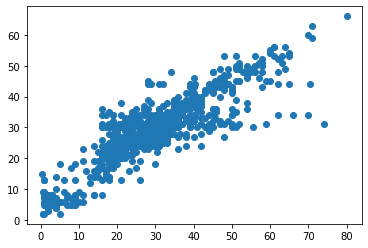

In [473]:
plt.scatter(Test_model['Age'], Test_model['Age_predict'])
plt.show()

### Adding new ages

In [474]:
generatedAgeValues = rfModel_age.predict(X = titanicWithoutAge[independentVariables])

In [475]:
titanicWithoutAge

,Pclass,SibSp,Parch,Fare,Age,female,male,CH,QU,SA,...,C,D,E,F,U,Clergy,Military,G,T,Noble
5,3,0,0,8.4583,NaN,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
17,2,0,0,13.0000,NaN,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
19,3,0,0,7.2250,NaN,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
26,3,0,0,7.2250,NaN,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
28,3,0,0,7.8792,NaN,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,3,0,0,7.2292,NaN,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
863,3,8,2,69.5500,NaN,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
868,3,0,0,9.5000,NaN,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
878,3,0,0,7.8958,NaN,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [476]:
titanicWithoutAge['Age'] = generatedAgeValues.astype(int)


In [477]:
titanicWithoutAge

,Pclass,SibSp,Parch,Fare,Age,female,male,CH,QU,SA,...,C,D,E,F,U,Clergy,Military,G,T,Noble
5,3,0,0,8.4583,38,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
17,2,0,0,13.0000,31,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
19,3,0,0,7.2250,32,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
26,3,0,0,7.2250,33,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
28,3,0,0,7.8792,20,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,3,0,0,7.2292,24,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
863,3,8,2,69.5500,14,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
868,3,0,0,9.5000,26,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
878,3,0,0,7.8958,27,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [478]:
titanicWithAge

,Pclass,SibSp,Parch,Fare,Age,female,male,CH,QU,SA,...,Noble,A,B,C,D,E,F,G,T,U
0,3,1,0,7.2500,22.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,71.2833,38.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,0,7.9250,26.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,53.1000,35.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,3,0,0,8.0500,35.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,0,5,29.1250,39.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
886,2,0,0,13.0000,27.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
887,1,0,0,30.0000,19.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
889,1,0,0,30.0000,26.0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [526]:

Trian_dt = titanicWithAge.append(titanicWithoutAge)

In [527]:
Trian_dt.reset_index(inplace=True)
Trian_dt.drop('index',inplace=True,axis=1)

In [528]:
Trian_dt

,Pclass,SibSp,Parch,Fare,Age,female,male,CH,QU,SA,...,Noble,A,B,C,D,E,F,G,T,U
0,3,1,0,7.2500,22.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,71.2833,38.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,0,7.9250,26.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,53.1000,35.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,3,0,0,8.0500,35.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,3,0,0,7.2292,24.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
887,3,8,2,69.5500,14.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
888,3,0,0,9.5000,26.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
889,3,0,0,7.8958,27.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [529]:
 Trian_dt.isnull().sum()

Pclass      0
SibSp       0
Parch       0
Fare        0
Age         0
female      0
male        0
CH          0
QU          0
SA          0
Miss        0
Mr          0
Mrs         0
Clergy      0
Common      0
Dr          0
Military    0
Noble       0
A           0
B           0
C           0
D           0
E           0
F           0
G           0
T           0
U           0
dtype: int64

## Finish with the Test data

In [530]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Noble,A,B,C,D,E,F,G,U,T
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,0,0,0,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,0,0,0,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,0,0,0,0,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,0,0,0,0,0,0,1,0


In [484]:
#fare

In [485]:
test_df['Fare'][test_df['Fare'].isnull()] 


152   NaN
Name: Fare, dtype: float64

In [486]:
#we fill in the missing value with the average price of 3rd class form Southampton

test_df['Fare'][test_df['Fare'].isnull()] = df['Fare'][(df['Embarked']=='SA') &   (df['Pclass']==3)].mean()



In [487]:
#enbarked
test_df["Embarked"][test_df["Embarked"]=='S']='SA' 
test_df["Embarked"][test_df["Embarked"]=='Q']='QU'
test_df["Embarked"][test_df["Embarked"]=='C']='CH' 


In [488]:
#Family Size
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [489]:
#Title

test_df['First name'] = test_df['Name'].str.split(',|\\.',expand = True)[2] #expand set to True to return a test_df instead of series
test_df['First name'] = test_df['First name'].str.strip() #strip leading and trailing white spaces
test_df['Last name'] = test_df['Name'].str.split(',|\\.',expand = True)[0] #expand set to True to return a test_df instead of series
test_df['Last name'] = test_df['Last name'].str.strip()
test_df['Title'] = test_df['Name'].str.split(',|\\.',expand = True)[1] #expand set to True to return a test_df instead of series
test_df['Title'] = test_df['Title'].str.strip()
test_df['First name'] = test_df['Name'].str.split(',|\\.',expand = True)[2] #expand set to True to return a test_df instead of series
test_df['First name'] = test_df['First name'].str.strip() #strip leading and trailing white spaces
test_df['Last name'] = test_df['Name'].str.split(',|\\.',expand = True)[0] #expand set to True to return a test_df instead of series
test_df['Last name'] = test_df['Last name'].str.strip()
test_df['Title'] = test_df['Name'].str.split(',|\\.',expand = True)[1] #expand set to True to return a test_df instead of series
test_df['Title'] = test_df['Title'].str.strip()

In [490]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [491]:
test_df['Status']=test_df.apply(Status, axis=1)

In [492]:
test_df['Title']=test_df.apply(replace_titles, axis=1)

In [493]:
test_df['Title'].value_counts()

Mr      265
Miss     79
Mrs      74
Name: Title, dtype: int64

In [494]:
test_df['Status'].value_counts()

Common      412
Clergy        2
Military      2
Dr            1
Noble         1
Name: Status, dtype: int64

In [495]:
 test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
First name       0
Last name        0
Title            0
Status           0
dtype: int64

In [496]:
test_df['Deck'] = test_df['Cabin'].str.replace('[0-9]','').str.split(' ', expand=True)[0]
#1. delete cabin number, leaving leading letter (deck); 2. since multiple cabins are assigned, just get the first one, they are all on the same deck



In [497]:
test_df['Deck'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Deck, dtype: int64

In [498]:
test_df["Deck"] = test_df["Deck"].fillna("U")

In [499]:
one_hot_encoded_Embarked = pd.get_dummies(test_df['Embarked'])
one_hot_encoded_Sex = pd.get_dummies(test_df['Sex'])
one_hot_encoded_Title = pd.get_dummies(test_df['Title'])
one_hot_encoded_Status= pd.get_dummies(test_df['Status'])
one_hot_encoded_Deck = pd.get_dummies(test_df['Deck'])


#titanicWithAge = test_df[variables]
test_df = pd.concat([test_df, one_hot_encoded_Sex, one_hot_encoded_Embarked, one_hot_encoded_Title,one_hot_encoded_Status,one_hot_encoded_Deck], axis = 1)

#one_hot_encoded_Embarked = pd.get_dummies(titanicWithoutAge['Embarked'])
#one_hot_encoded_Sex = pd.get_dummies(titanicWithoutAge['Sex'])
#one_hot_encoded_Title = pd.get_dummies(titanicWithoutAge['Title'])
#one_hot_encoded_Status = pd.get_dummies(titanicWithoutAge['Status'])
#one_hot_encoded_Deck = pd.get_dummies(titanicWithoutAge['Deck'])





#titanicWithoutAge = titanicWithoutAge[variables]
#titanicWithoutAge = pd.concat([titanicWithoutAge, one_hot_encoded_Sex, one_hot_encoded_Embarked, one_hot_encoded_Title,one_hot_encoded_Status,one_hot_encoded_Deck], axis = 1)


In [500]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Military,Noble,A,B,C,D,E,F,G,U
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,0,0,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,0,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,0,1,0,0,1,0,0,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,0,0,0,0,0,0,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,1


In [501]:
test_df
for col in test_df.columns:
    print(col)

PassengerId
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked
FamilySize
First name
Last name
Title
Status
Deck
female
male
CH
QU
SA
Miss
Mr
Mrs
Clergy
Common
Dr
Military
Noble
A
B
C
D
E
F
G
U


In [502]:
#Missing column in withoutage data
test_df['T']=0

In [503]:
#Age

In [504]:
#titanicWithAge = df[pd.isnull(df['Age']) == False]
testWithoutAge = test_df[pd.isnull(test_df['Age'])]

In [505]:
testWithoutAge

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Noble,A,B,C,D,E,F,G,U,T
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,...,0,0,0,0,0,0,0,0,1,0
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,...,0,0,0,0,0,0,0,0,1,0
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,...,0,0,0,0,0,0,0,0,1,0
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,...,0,0,0,0,0,0,0,0,1,0
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,...,0,0,0,0,0,0,0,0,1,0
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,...,0,0,0,0,0,0,0,0,1,0
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0


In [506]:
testAgeValues = rfModel_age.predict(X = testWithoutAge[independentVariables])

In [509]:
len(testAgeValues)

86

In [510]:

testWithoutAge['Age'] = testAgeValues.astype(int)

In [518]:

testWithoutAge

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Noble,A,B,C,D,E,F,G,U,T
10,902,3,"Ilieff, Mr. Ylio",male,27,0,0,349220,7.8958,NaN,...,0,0,0,0,0,0,0,0,1,0
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,45,0,0,PC 17598,31.6833,NaN,...,0,0,0,0,0,0,0,0,1,0
29,921,3,"Samaan, Mr. Elias",male,23,2,0,2662,21.6792,NaN,...,0,0,0,0,0,0,0,0,1,0
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,32,1,2,W./C. 6607,23.4500,NaN,...,0,0,0,0,0,0,0,0,1,0
36,928,3,"Roth, Miss. Sarah A",female,25,0,0,342712,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,18,0,0,334915,7.7208,NaN,...,0,0,0,0,0,0,0,0,1,0
410,1302,3,"Naughton, Miss. Hannah",female,22,0,0,365237,7.7500,NaN,...,0,0,0,0,0,0,0,0,1,0
413,1305,3,"Spector, Mr. Woolf",male,30,0,0,A.5. 3236,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0
416,1308,3,"Ware, Mr. Frederick",male,30,0,0,359309,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0


In [519]:
test = testWithoutAge.append(test_df[pd.isnull(test_df['Age']) == False])

#test.reset_index(inplace=True)
#data.drop('index',inplace=True,axis=1)

In [520]:
test['Age'].describe()

count    418.000000
mean      30.527512
std       13.292925
min        0.170000
25%       22.000000
50%       28.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [417]:
 test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
First name       0
Last name        0
Title            0
Status           0
Deck             0
female           0
male             0
CH               0
QU               0
SA               0
Miss             0
Mr               0
Mrs              0
Clergy           0
Common           0
Dr               0
Military         0
Noble            0
A                0
B                0
C                0
D                0
E                0
F                0
G                0
U                0
T                0
dtype: int64

In [532]:
Trian_dt.to_csv( "Train_clean.csv", index=False, encoding='utf-8-sig')
test.to_csv( "Test_clean.csv", index=False, encoding='utf-8-sig')